In [1]:
import torch
import torch.nn as nn

from config import *
from model import CascadedNet, ComplexMLP
from dataset import load_dataset
from mytrainer import train_ch

In [2]:
func_type = 2
if func_type == 1:
    input_dim, output_dim = 1, 1
elif func_type == 2:
    input_dim, output_dim = 2, 1
else:
    input_dim, output_dim = 2, 2

In [3]:
train_iter, test_iter = load_dataset(type=func_type, device=device, generate=False)

In [4]:
netList = {
    "CascadedNet": CascadedNet(
        input_dim,
        [
            ([256, 128], 64),
            ([64, 16], 8),
            ([8], output_dim),
        ],
    ).to(device),
    "MLPNet": nn.Sequential(
        nn.Linear(input_dim, 256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.Tanh(),
        nn.Linear(512, 256),
        nn.Tanh(),
        nn.Linear(256, 128),
        nn.SiLU(),  # 更平滑的激活函数（可选项）
        nn.Linear(128, output_dim),
    ).to(device),
    "ComplexMLP": ComplexMLP(
        input_dim, output_dim, hidden_dims=[1024, 512, 512, 256, 256, 256, 128, 128, 64], dropout=0.2, activation=nn.SiLU()
    ).to(device),
}

In [5]:
# name = "CascadedNet"
# name = "MLPNet"
name = "ComplexMLP"
net = netList[name].to(device)

In [6]:
loss = nn.MSELoss(reduction="none")  # 均方误差
trainer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=1.0)  # 防止梯度爆炸

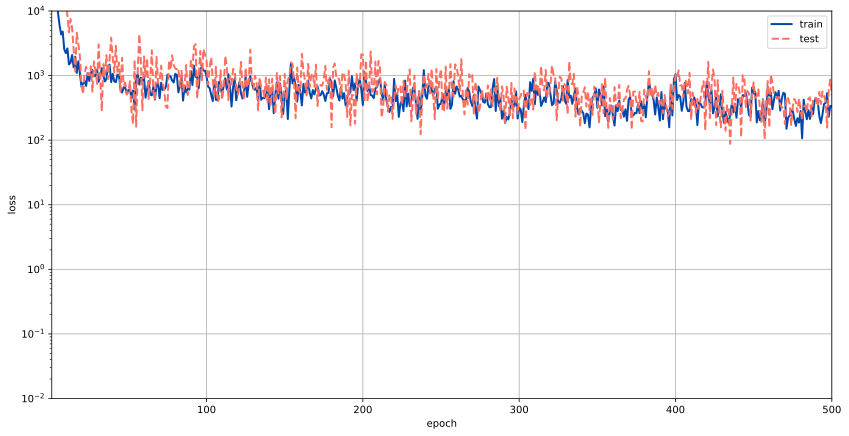

In [7]:
train_ch(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
torch.save(net, f"{name}.pt")